In [ ]:
#References: 
#1. How to plot a validation curve tutorial: https://youtu.be/B_nG5GRhjJg?si=YERbFeE3axIU5n5S
#2. How to Plot a Confusion Matrix Heat Map Tutorial: https://youtu.be/98LX2iRWXsY?si=FzrMP158zvjOFllT
#3. K-Fold Cross Validation Tutorial: https://youtu.be/gJo0uNL-5Qw?si=3C7BiFfQXAd70014
#4. How to calculate F1-Scores Tutorial: https://youtu.be/ZQlEcyNV6wc?si=BzzPwCN2cMD5y6Vp
#5. How to Plot a Decision Tree Tutorial (Also uses accuracy, F1 scores): https://youtu.be/D1ZmxwHAEJA?si=VlitaXywH2GahTqB
#6. Sklearn confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#7 Sklearn F1 Score: https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.f1_score.html
#8. SKlearn Label Encoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#9. Skelearn train-test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [57]:
import numpy as np
from skimage import filters
def angle (dx, dy):
    angle1 = np.arctan2(dy,dx)
    angle1 = np.mod(angle1,np.pi)       #To ensure the angle is in [0,pi]
    return angle1

In [58]:
from PIL import Image
import numpy as np
import os
from skimage import data
from skimage.color import rgb2gray
from skimage import data, exposure, img_as_float


def loadImages(t):

   # imageFolder = os.getcwd()                            # Gets the current directory
   # imageFolder = os.path.join(imageFolder, t)           #Gets subdirectory 
    
    imageFolder=t
    imageList=[]
    i=0
    for filename in sorted(os.listdir(imageFolder)):
    #for filename in os.listdir(imageFolder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            try:
                filePath = os.path.join(imageFolder, filename)
            
                with Image.open(filePath) as img:
                
                    
                    imgGray = img.convert('L')                   #Code below did not work, some images had 3 channels other had 4
                    
                #-----------------------------------------------------
               
                    #img2 = np.array(img)            
                    #print(img2.shape)
                    #img = img_as_float(img)            
                    #imgGray = rgb2gray(img2)    

                #-----------------------------------------------------    
                
                    imgResized = imgGray.resize((512,512))       #It was necessary to be able to load them in a numpy array
                
                

                    imageArray = np.array(imgResized)
                    
                    imageList.append(imageArray)
                    #---------------------------------------------------------------------------------------------------
                    
            except Exception as e:
                print(f"Could not load image {filename}: {e}")
    covidImagesGray = np.array(imageList)
    print("Shape of the final NumPy array:", covidImagesGray.shape)
    return covidImagesGray
    
    #If not sorted order of loaded images can change between runs
    #Since I am aligning labels ("Covid", "Normal", "Viral") based on their order in the array,
    #an inconsistent load order would assign wrong labels to wrong images 

In [59]:
import numpy as np
from skimage import filters

def sobelFilter(covidImages):
    size = len(covidImages)
    
#Applies sobel filters to images and obtains vector of gradients.  
#The angle function will obtain the angle expressed in radians that is represented 

    hSobelImages=[None]*size
    vSobelImages=[None]*size
    sobelImages = [None]*size
    for i in range (size):
        hSobelImages[i] = filters.sobel_h(covidImages[i])                        
        vSobelImages[i] = filters.sobel_v(covidImages[i])
    for i in range (size):
        sobelImages[i] = angle(hSobelImages[i],vSobelImages[i])
    sobelImages=np.array(sobelImages)
    return sobelImages   

In [60]:
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
import numpy as np

#Compute and print one histogram using np.histogram
def histogramFunc (image1,image2,t):

    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
    
        
#Display the original image in the first subplot
    ax1.imshow(image1, cmap='gray')
    if (t==('Covid')):
        ax1.set_title('Covid Gray Scale Image')
    elif t == 'Normal':
        ax1.set_title('Normal Gray Scale Image')
    elif t == 'Viral':
        ax1.set_title('Viral Gray Scale Image')
    else:
        ax1.set_title('Image from Covid Dataset')
    ax1.axis('off')  
 
    covidImage = image2
    histValues,binEdges = np.histogram(covidImage, bins=36)          #histValues contains the count of edge pixels at different intensity levels of sobel images 
                                                                     #histValues contains edge histograms  
    # exposure.histogram(covidImage, nbins=36)                        # computes and returns the histogram of the image.
 #Calculate the bin center:
    binCenters = (binEdges[:-1] + binEdges[1:]) / 2                  #binEdges[:-1] all values except last one 
                                                                     #binEdges[1:] all values except first one
    
    plt.bar(binCenters, histValues, width=np.diff(binEdges), edgecolor='black')           #display histogram as a bar chart
    plt.xlabel("Bins")
    plt.ylabel("Pixel Count")
    plt.title("Histogram of Data")
    plt.show()
    print (histValues.shape)
    return histValues

In [61]:
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
import numpy as np

#Compute and print one histogram using exposure.histogram
def histogramFunc2 (image1,image2,t):

    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
           

    ax1.imshow(image1, cmap='gray')                                                    #Display the original image in the first subplot
    if (t==('Covid')):
        ax1.set_title('Covid Gray Scale Image')
    elif t == 'Normal':
        ax1.set_title('Normal Gray Scale Image')
    elif t == 'Viral':
        ax1.set_title('Viral Gray Scale Image')
    else:
        ax1.set_title('Image from Covid Dataset')
    ax1.axis('off')  
 
    covidImage = image2
               
    histValues,binCenters=exposure.histogram(covidImage, nbins=36)                        # computes and returns the histogram of the image and bin centers.
 
    # Estimate bar width from bin centers
    binWidth = binCenters[1] - binCenters[0]
    plt.bar(binCenters, histValues, width=binWidth, edgecolor='black')           #display histogram as a bar chart
    plt.xlabel("Bins")
    plt.ylabel("Pixel Count")
    plt.title("Histogram of Data")
    plt.show()
    print (histValues.shape)
    return histValues

In [62]:
def histogramValues(image):
    histValues,binEdges = np.histogram(image, bins=36)
    histValues = histValues / np.sum(histValues)
    return histValues

In [63]:
def histogramValues2(image):
    histValues,binCenter = exposure.histogram(image, bins=36)
    histValues = histValues / np.sum(histValues)

    return histValues
#StandardScaler does not work on individual images. It just ensures 
#there is a zero mean and sd=1 in the entire dataset.
#which means some images with a very different histogram values may skew these values


In [64]:
 #Plots all the images from classes with their edge histograms
#by uncommenting the histogram statement

from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
import numpy as np

imageFolder = 'AllFiles'
covidImagesGray = loadImages(imageFolder)
sobelImages=sobelFilter(covidImagesGray)
histValues=[None]*317
for i in range(317):
    #histogramFunc(covidImagesGray[i],sobelImages[i],'Image from Covid Dataset')
    histValues[i]=histogramValues(sobelImages[i])

Shape of the final NumPy array: (317, 512, 512)


In [65]:
 import matplotlib.pyplot as plt
 from sklearn.decomposition import PCA
 
# Convert histogram values to a 2D array:
def convertHistValues(file1):
    size=len(file1)
    histValues = [None]*size            #empty list
    histValues = np.array(histValues)   #Convert to numpy arrat
    histValues = np.zeros((size, 36))                                       
    for i in range(size):
         histValues[i] = np.histogram(file1[i], bins=36)[0]       #histogram returns tuple, first[0] contain counts, second[1] edges of the bin     
    print(histValues.shape)                                       #[0] only selects the first item in the tuple
    return histValues
 

In [66]:
def assignLabels(imageLabels):

    #for filename in sorted(os.listdir(imageFolder)):
        
    imageFolder = 'Train/Covid'
    trainCovidImages = loadImages(imageFolder)
    size1=len(trainCovidImages)
    for i in range (size1):
        imageLabels[i]="Covid"

    imageFolder = 'Train/Normal'
    trainNormalImages = loadImages(imageFolder)
    size2=size1+len(trainNormalImages)
    
    for i in range (size1 , size2):
        imageLabels[i]="Normal"

    
    imageFolder = 'Train/Viral'
    trainViralImages = loadImages(imageFolder)
    size3=size2+len(trainViralImages)
    
    for i in range (size2,size3):
        imageLabels[i]="Viral"
        
    imageFolder = 'Test/Covid'
    testCovidImages = loadImages(imageFolder)
    size4=size3+len(testCovidImages)
    
    for i in range (size3,size4):
        imageLabels[i]="Covid"

    imageFolder = 'Test/Normal'
    testNormalImages = loadImages(imageFolder)
    size5=size4+len(testNormalImages)
    
    for i in range (size4,size5):
        imageLabels[i]="Normal"

    imageFolder = 'Test/Viral'
    testViralImages = loadImages(imageFolder)
    size6=size5+len(testViralImages)
    
    for i in range (size5,size6):
        imageLabels[i]="Viral"    
        
    allFiles = np.concatenate([trainCovidImages,trainNormalImages,trainViralImages,testCovidImages,testNormalImages, testViralImages] )
    allTrainingFiles =  np.concatenate([trainCovidImages,trainNormalImages,trainViralImages] )
    allTestingFiles=np.concatenate([testCovidImages,testNormalImages, testViralImages])
    return allFiles, allTrainingFiles,allTestingFiles

    

In [67]:
labels = [None]*317

    
allFiles2, allTrainingFiles2,allTestingFiles2=assignLabels(labels)
sobelImagesAll2=sobelFilter(allFiles2)
histValuesAll2=[None]*317
for i in range(317):
    #histValuesAll2[i]=histogramFunc(allFiles2[i],sobelImagesAll2[i],'Image from Covid Dataset')
    histValuesAll2[i]=histogramValues(sobelImagesAll2[i])
histValuesAll2=np.array(histValuesAll2)


Shape of the final NumPy array: (111, 512, 512)
Shape of the final NumPy array: (70, 512, 512)
Shape of the final NumPy array: (70, 512, 512)
Shape of the final NumPy array: (26, 512, 512)
Shape of the final NumPy array: (20, 512, 512)
Shape of the final NumPy array: (20, 512, 512)


(317, 36)
(253, 36) (253,)
Mean [-1.09267009e-16  4.64275083e-16 -4.82705663e-18 -1.97031675e-16
 -3.59396307e-16 -5.16495059e-16 -2.97522218e-16 -4.82266840e-16
 -2.96425159e-16 -2.98838688e-16 -4.94115069e-16  6.59112641e-16
 -2.65049291e-16  3.76510417e-16 -3.67404833e-16  8.12261984e-16
 -7.76497882e-16 -1.25942296e-16 -2.50129298e-16 -1.29891706e-16
  3.14636328e-16  1.05328570e-15  6.24445598e-16  5.91533849e-16
 -7.12649088e-16  1.37790526e-16  8.17089040e-16 -5.66082096e-16
  5.88023262e-16  3.45792784e-16  1.46566992e-16 -5.19566823e-16
  4.83144486e-16 -3.80021004e-16 -1.18921122e-16  1.17604652e-16] 

Standard Deviation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

Mean [-0.08427809 -0.05125703 -0.01953313  0.04117129 -0.08553928 -0.00616934
 -0.00945381 -0.07355353  0.13878076  0.12269627  0.01008188  0.03867158
  0.10022989  0.01468987  0.14023561  0.1492335   0.10423957  0.05750839
  0.06875815  0.10453167

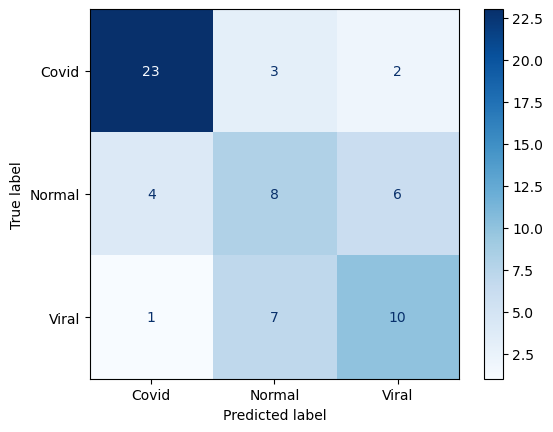

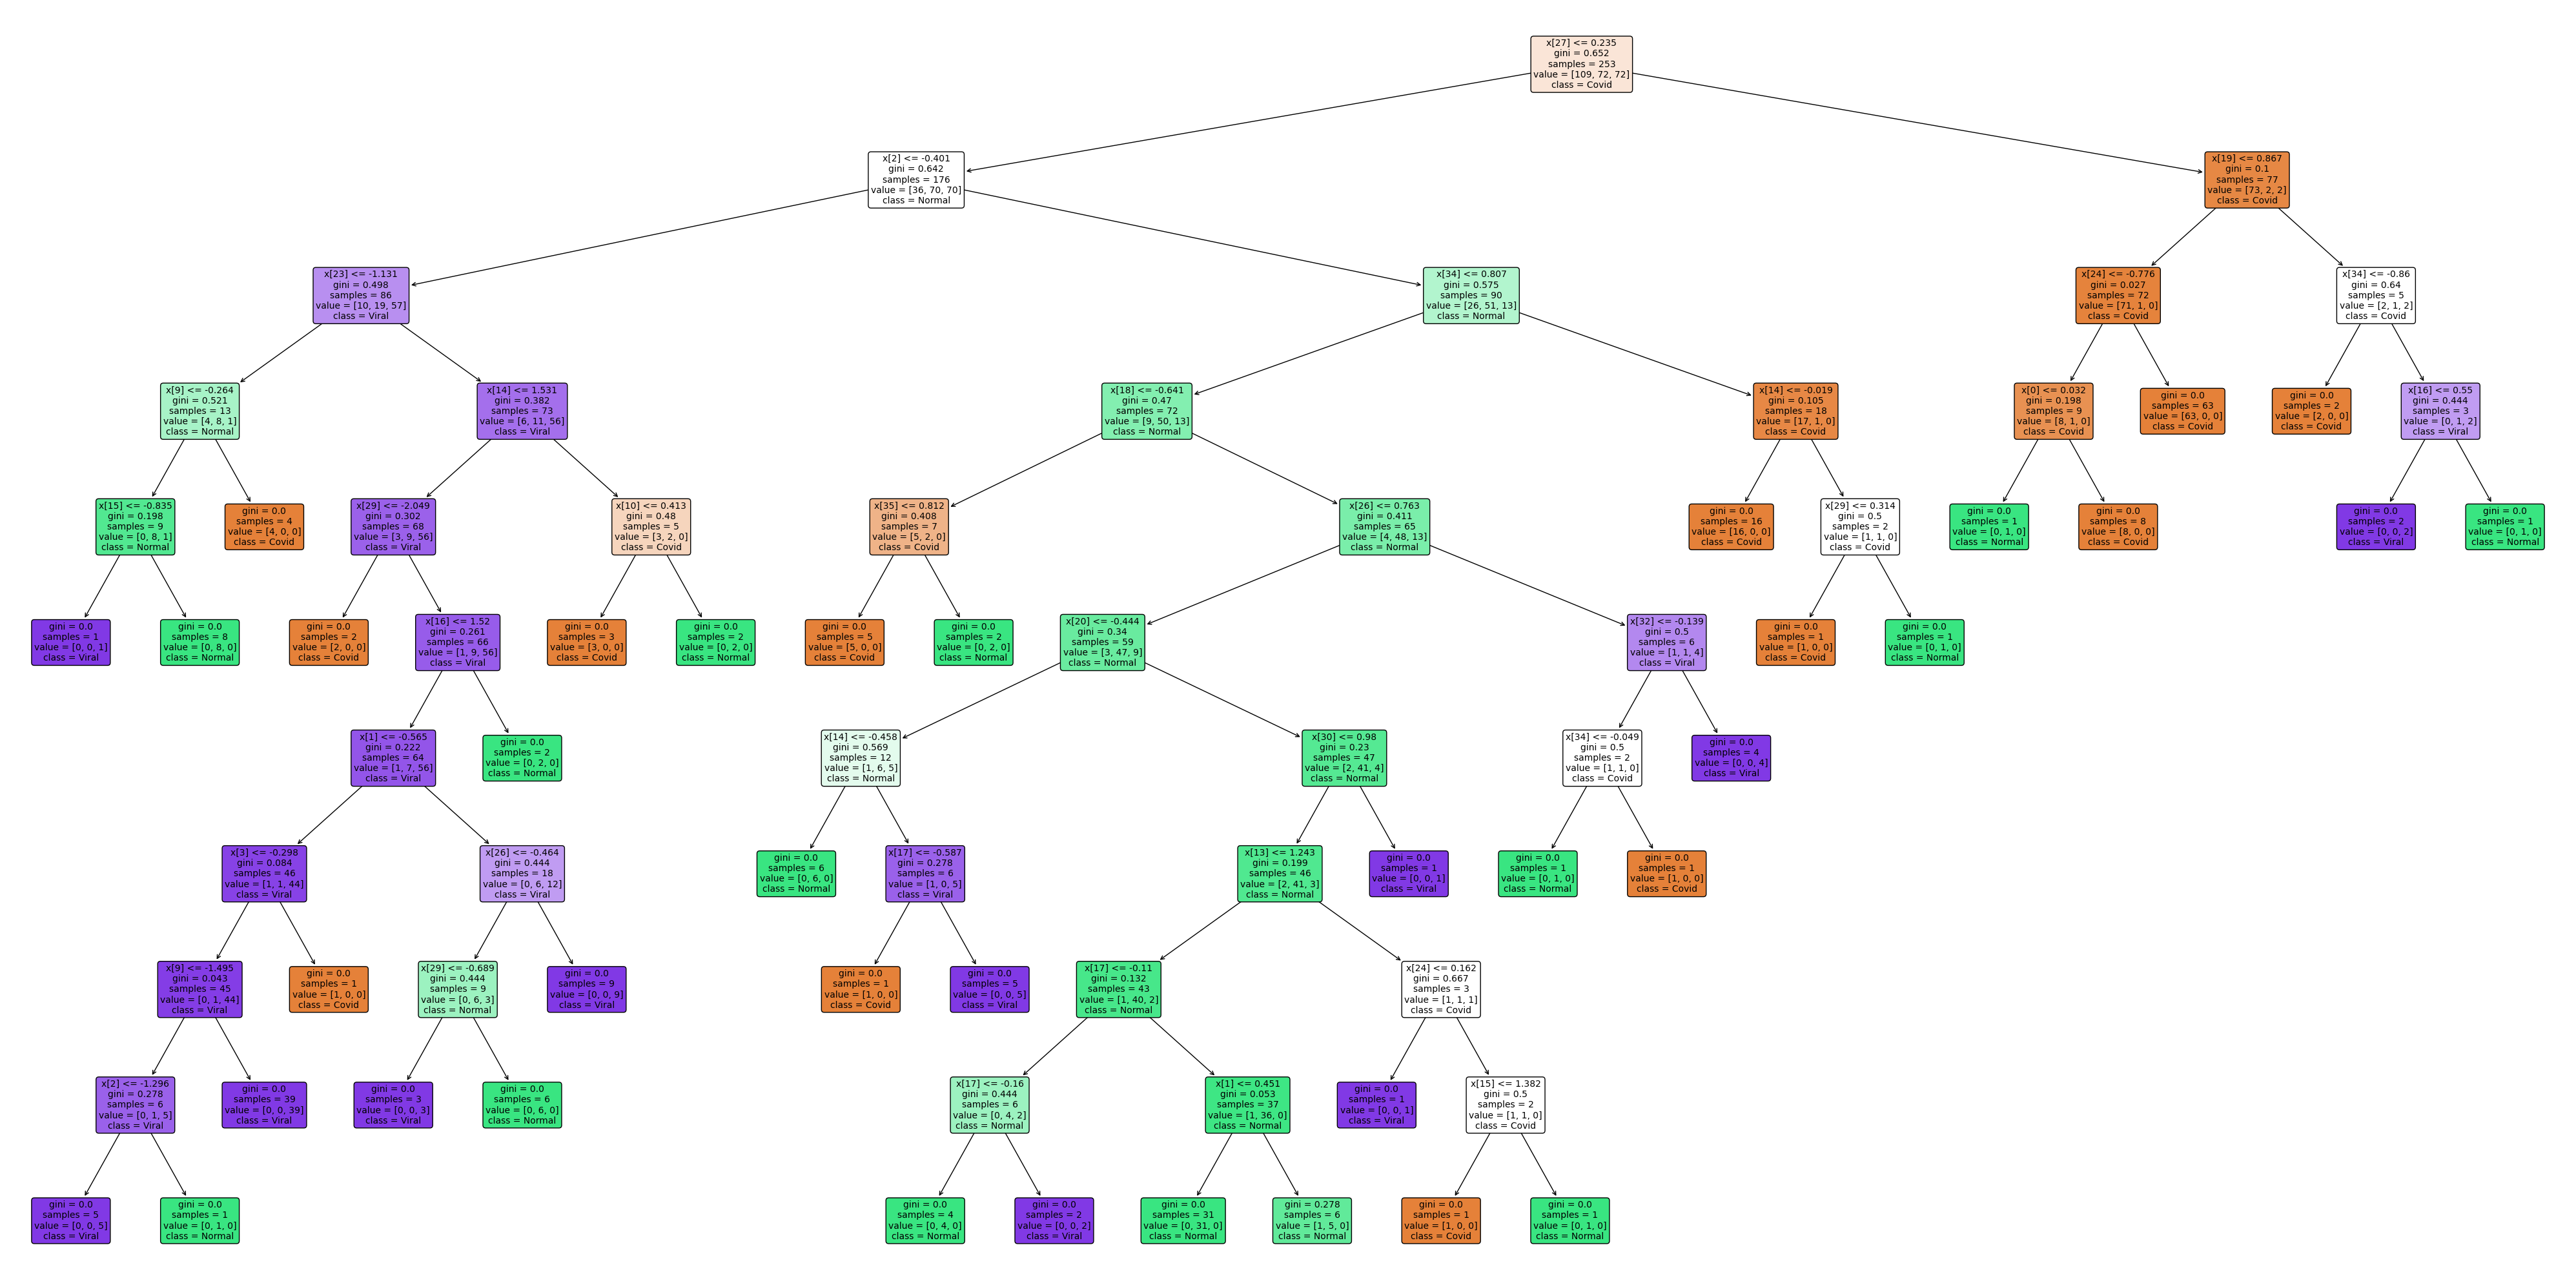

In [68]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  #YouTube
from sklearn.preprocessing import StandardScaler

#----------------Questions 1-5: Splitting and Standarization---------------------------------------------
y=np.array(labels)
#print(y.shape)


X=histValuesAll2
print(X.shape)
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, stratify=y)
print(xTrain.shape, yTrain.shape)

scaler = StandardScaler()
scaler = scaler.fit(xTrain)
xTrainScaled = scaler.transform(xTrain)      # Fit and transform training data
xTestScaled = scaler.transform(xTest)        # only transform test data, y are labels so not necessary there

print("Mean", xTrainScaled.mean(axis = 0),'\n')
print("Standard Deviation", xTrainScaled.std(axis = 0),'\n')

print("Mean", xTestScaled.mean(axis = 0),'\n')
print("Standard Deviation", xTestScaled.std(axis = 0),'\n')


#-----------------------------------------------------------------------------------------------

le = LabelEncoder()                                # Initialize LabelEncoder
le.fit(yTrain)                                          #Fit only training data

yTrainEncoded = le.transform(yTrain)             #Transform both, test and training
yTestEncoded = le.transform(yTest)
#-------------------------------------------------------------------------------------------

dtc = tree.DecisionTreeClassifier(max_depth = 10)
dtc = dtc.fit(xTrainScaled, yTrainEncoded)
score = dtc.score(xTestScaled, yTestEncoded)
yPred = dtc.predict(xTestScaled)
print("Score ",score)


#-----------------Code below not part of the assignment, I just wanted to see the tree, the confusion matrix and labels---------------
ConfusionMatrixDisplay.from_predictions(yTestEncoded, yPred, display_labels=le.classes_, cmap="Blues")

plt.figure(figsize=(40, 20))
tree.plot_tree(
    dtc,
    class_names=le.classes_.tolist(),  # Display string labels. 
    filled=True,
    rounded=True,
    fontsize=10
)

plt.tight_layout()                                           #helps prevent overlapping of nodes
plt.savefig("myTree.pdf", format='pdf')
plt.show()

#The darker or more saturated the color, the more confident the prediction 
#Lighter shades indicate lower confidence or more impurity in the node (more mixed classes).
#------------------------------------------------------------------------------------------------------------------------------------------




In [69]:
from sklearn.ensemble import RandomForestClassifier   #YouTube video
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  

rfc = RandomForestClassifier()
rfc.fit(xTrainScaled, yTrainEncoded)
yPred = rfc.predict(xTestScaled)
score = rfc.score(xTestScaled, yTestEncoded)                               #Evaluates on unseen data
print("Random Forest Score:", score)

#-----------------------------------




Random Forest Score: 0.765625


In [70]:
from sklearn.naive_bayes import GaussianNB

#1.
gnb = GaussianNB()
gnb.fit(xTrainScaled, yTrainEncoded)

# 2. Predict and evaluate
yPred = gnb.predict(xTestScaled)
print(gnb.score(xTestScaled, yTestEncoded))



0.609375


In [71]:
def confusionMatrix(y1,y2,modelName):
     # Confusion matrix
    cm = confusion_matrix(y1, y2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix - " + modelName)
    plt.show()

In [72]:
#Compute Test Accuracies (cross_val_scores trains and validates on different folds on the training, not test):
def accuracies(x1,y1,x2,y2,model):
    model.fit(x1, y1)                                     #Fits the training data
    yPredTest = model.predict(x2)                         #predicts on test

    accTest = accuracy_score(y2, yPredTest)               #Computes accuracy on test

    print(round(accTest, 4))


Cross-validation 	 Decision Tree
Accuracy 	 Decision Tree 	 = 	 0.7233


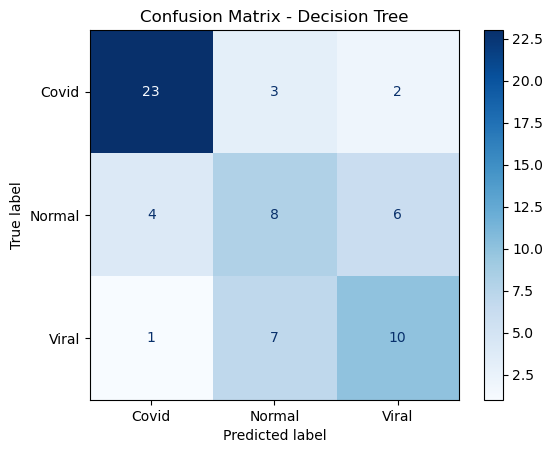


Cross-validation 	 Random Forest
Accuracy 	 Random Forest 	 = 	 0.7984


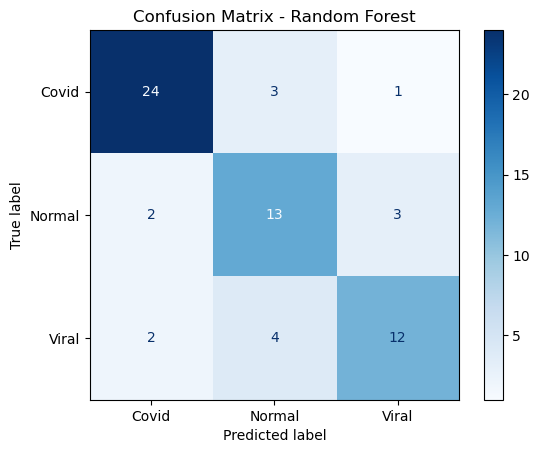


Cross-validation 	 Naive Bayes
Accuracy 	 Naive Bayes 	 = 	 0.747


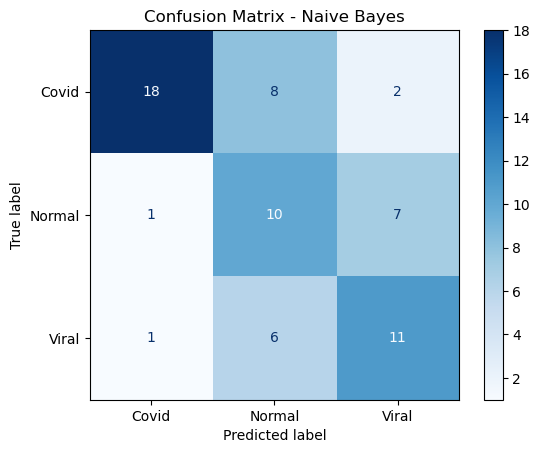


Accuracy Results of Stratified 5-Fold:
Decision Tree 	 0.7233
Random Forest 	 0.7984
Naive Bayes 	 0.747

Accuracy Test Resuslts
Decision Tree 		0.7031
Random Forest 		0.7656
Naive Bayes 		0.6094


In [73]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
#from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Confusion Matrix
"""
By visually comparing to determine which one is the best method you will add all the values in the diagonal.
The method that produces the highest sum would be the best method because position (1,1) represent class 1 correctily classified as 1,
position (2,2) represents examples in class 2 correctly clssified as 2, etc.
Random Forest is the best method according to  Confusion Matrix
Random Forest is the best method according mean validation Accuracy
Random Forest is the best method according to accuracy test results

"""
models = {
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "Naive Bayes": gnb
}

skf = StratifiedKFold(n_splits=5, shuffle=True)
results = [None]*3

modelNames = list(models.keys())
modelObjects = list(models.values())


for i in range(len(modelNames)):
    modelName = modelNames[i]
    model = modelObjects[i]
    print("\nCross-validation", "\t", modelName)
    
    yPred = cross_val_predict(model, xTrainScaled, yTrainEncoded, cv=skf)   #returns an array of predicted labels, same length as yTrainEncoded
    yPredTest = model.predict(xTestScaled)                                  #returns an array of predicted labels, same length as yTestEncoded
    
    acc = accuracy_score(yTrainEncoded, yPred)
    results[i] = acc                                                        
    print("Accuracy", "\t", modelName, "\t", "=", "\t", round(acc, 4))

    confusionMatrix(yTestEncoded, yPredTest,modelName)                 #Compares true training labels with prediction labels
    
print("\nAccuracy Results of Stratified 5-Fold:")
for i in range(len(modelNames)):
    print(modelNames[i], "\t", round(results[i], 4))
    
print("\nAccuracy Test Resuslts")
for i in range (3):
    print(modelNames[i],"\t", end="\t")
    accuracies(xTrainScaled,yTrainEncoded,xTestScaled,yTestEncoded,modelObjects[i])





In [74]:
from sklearn.metrics import f1_score

# F1 Scores
"""
Random Forest is the best method according to F1 Scores
"""
modelNames = ["Decision Tree", "Random Forest", "Naive Bayes"]
models = [dtc, rfc, gnb]


f1Results = [None]*3
for i in range(len(models)):
    modelName = modelNames[i]
    model = models[i]
    
    model.fit(xTrainScaled, yTrainEncoded)           # Train
    yPred = model.predict(xTestScaled)               # Predict
    
    f1 = f1_score(yTestEncoded, yPred, average='weighted')  # Compute weighted F1-score
    f1Results[i]=f1
    
    print(modelName, "\t", f1)

bestValue = max(f1Results)
bestModel = f1Results.index(bestValue)

print("\nBest method by F1-score:", modelNames[bestModel], "with score", f1Results[bestModel])


Decision Tree 	 0.702521718146718
Random Forest 	 0.7365479115479115
Naive Bayes 	 0.6248825187969924

Best method by F1-score: Random Forest with score 0.7365479115479115


In [75]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings

#Accuracies
warnings.filterwarnings("ignore")


filter1 = np.isin(yTrainEncoded, [0, 1])              #0=Covid, 1=Normal. Returns array of booleans Shows True if that element is found 
filter2 = np.isin(yTestEncoded, [0, 1])

xTwo = xTrainScaled[filter1]                         #Selects rows where filter1 is true
yTwo = yTrainEncoded[filter1]

xTestTwo = xTestScaled[filter2]
yTestTwo = yTestEncoded[filter2]

 
cValues = [0.1, 1, 10, 100]     #Strong regularization, balance model, weak, very weak
scores=[None]*4

kf = KFold(n_splits=5, shuffle=True)
skf = StratifiedKFold(n_splits=5, shuffle=True)



In [76]:
from sklearn.model_selection import validation_curve
from sklearn.svm import LinearSVC
import numpy as np

#Standard K-Fold Training and Validation Errors
trainErrorsKf = []
valErrorsKf = []
trainScores, valScores = validation_curve(
    
    LinearSVC(),
    xTwo, yTwo,
    param_name="C",
    param_range=cValues,
    cv=kf,          # number of folds (same as KFold)
    scoring='accuracy'
)

# Convert to percentage errors
trainErrorsKf = 100 * (1 - np.mean(trainScores, axis=1))
valErrorsKf = 100 * (1 - np.mean(valScores, axis=1))

In [77]:
print("Standard K-Fold:\n")
for i in range(len(cValues)):
    k = cValues[i]
    print("C = \t", k, "\tMean Accuracy =", round(np.mean(valScores[i]), 4))



Standard K-Fold:

C = 	 0.1 	Mean Accuracy = 0.9063
C = 	 1 	Mean Accuracy = 0.9174
C = 	 10 	Mean Accuracy = 0.9062
C = 	 100 	Mean Accuracy = 0.9006


In [78]:
from sklearn.model_selection import validation_curve
from sklearn.svm import LinearSVC
import numpy as np

#Stratified K-Fold errors Training and Validation Errors
trainErrorsSkf = []
valErrorsSkf = []

trainScores, valScores2 = validation_curve(
    
    LinearSVC(),
    xTwo, yTwo,
    param_name="C",
    param_range=cValues,
    cv=skf,          
    scoring='accuracy'
)

# Convert to percentage errors
trainErrorsSkf = 100 * (1 - np.mean(trainScores, axis=1))
valErrorsSkf = 100 * (1 - np.mean(valScores2, axis=1))

#----------------


In [79]:
print("Stratified K-Fold:\n")
for i in range(len(cValues)):
    k = cValues[i]
    print("C =", k, "\tMean Accuracy =", round(np.mean(valScores2[i]), 4))

Stratified K-Fold:

C = 0.1 	Mean Accuracy = 0.9059
C = 1 	Mean Accuracy = 0.9057
C = 10 	Mean Accuracy = 0.8893
C = 100 	Mean Accuracy = 0.8785


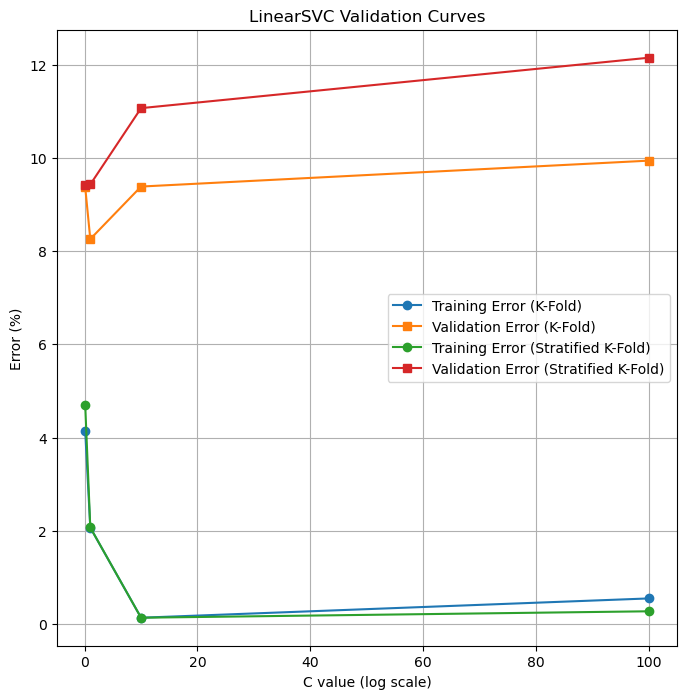

In [80]:

plt.subplots(1,figsize=(8,8))
plt.plot(cValues, trainErrorsKf, 'o-', label='Training Error (K-Fold)')
plt.plot(cValues, valErrorsKf, 's-', label='Validation Error (K-Fold)')
plt.plot(cValues, trainErrorsSkf, 'o-', label='Training Error (Stratified K-Fold)')
plt.plot(cValues, valErrorsSkf, 's-', label='Validation Error (Stratified K-Fold)')


plt.xlabel('C value (log scale)')
plt.ylabel('Error (%)')
plt.title('LinearSVC Validation Curves')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
#Lowest mean validation error question
"""
The SVM objective function wants to maximize the margin 2/||w|| which equivalent to minimizing ||w"||^2/2
It adds another term with the parameter C myltiplied by the total penalty for all misclassifications or margin violations
If C is large, the svm svm tries to minimize the number of misclassifications which produces a small margin
If C is small svm is more flexible and produces a larger margin 
A large C gives more weight to minimizing the penalty term (C*Summation), train error low, (Overfitting)
A small C gives less weight to the penalty, allowing more errors  (Underfitting)
Low C train and validation error high, Underfitting)
High C, train error low, validation error start to increase, overfitting
When C is low the model complexity is low and allows high training and validation error
WHen C is high the model complexity is high and produces low training errors
"""
from sklearn.svm import LinearSVC

bestIndex = np.argmin(valErrorsSkf)  # finds the index of the smallest value in the array. valErrorsSkf = validation errors from stratified CV
bestC = cValues[bestIndex]
print("Best C:", bestC)

svmBest = LinearSVC(C=bestC)
svmBest.fit(xTwo, yTwo)

yPredTest = svmBest.predict(xTestTwo)
accuracyTest = accuracy_score(yTestTwo, yPredTest)

testError = 100 * (1 - accuracyTest)  # percentage error or complement of accuracy

print("Test error (%):", testError)

Best C: 0.1
Test error (%): 10.869565217391308
